In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set plotting params
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24

In [3]:
# load data
Train = pd.read_csv('../data/Train.csv')

df = Train.iloc[:, [0, 1, 6, 7, 15, 17, 18]]

/Users/josiah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.describe()

,SalesID,SalePrice,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2013.000000,2.483300e+06


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   YearMade                  401125 non-null  int64  
 3   MachineHoursCurrentMeter  142765 non-null  float64
 4   ProductSize               190350 non-null  object 
 5   state                     401125 non-null  object 
 6   ProductGroup              401125 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.4+ MB


<ipython-input-32-2b0d88b6f49f>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df.iloc[:, 1:], alpha=0.2, ax=ax)


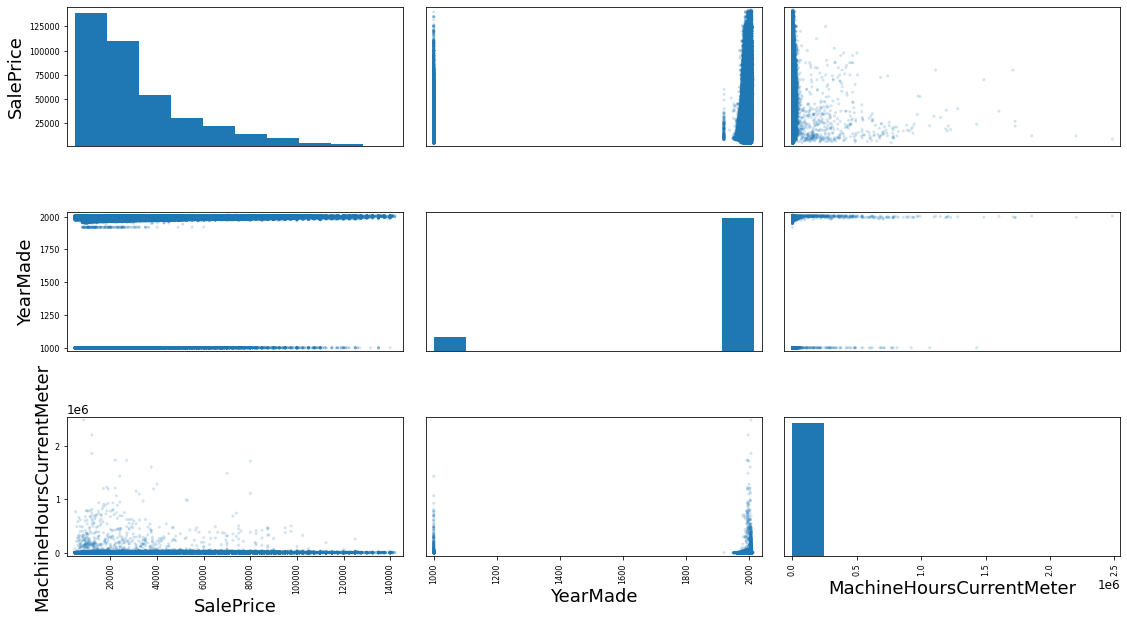

In [32]:
fig, ax = plt.subplots(figsize=(16, 9))

pd.plotting.scatter_matrix(df.iloc[:, 1:], alpha=0.2, ax=ax)

fig.tight_layout()
fig.savefig('../img/scatter_matrix.jpg')

In [6]:
# create states dataframes
states = df.groupby('state').size().sort_values(ascending=False)
ratio = states / states.sum()
states = pd.DataFrame([states, ratio])
states = states.T
states.columns = ['n_sales', 'ratio']
states.reset_index(inplace=True)

<ipython-input-7-f1b1ccd7ea65>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(states['state'], rotation=90)


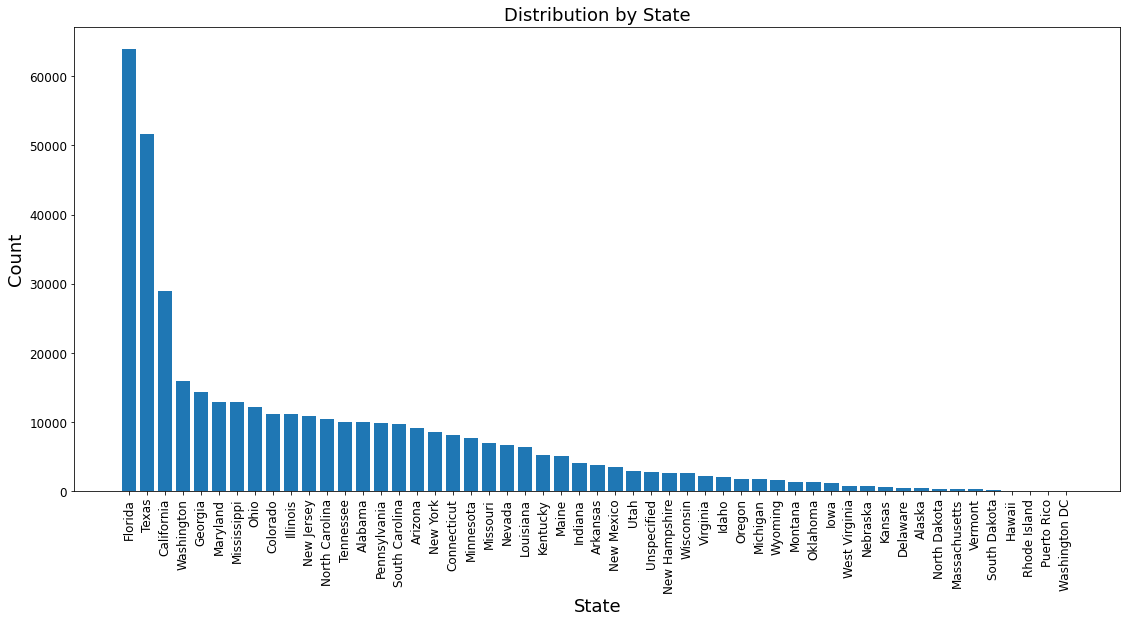

In [7]:
# plot state frequency histogram
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(states['state'], states['n_sales'])

ax.set_title('Distribution by State')
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_xticklabels(states['state'], rotation=90)

fig.tight_layout()

fig.savefig('../img/distribution_state.jpg')

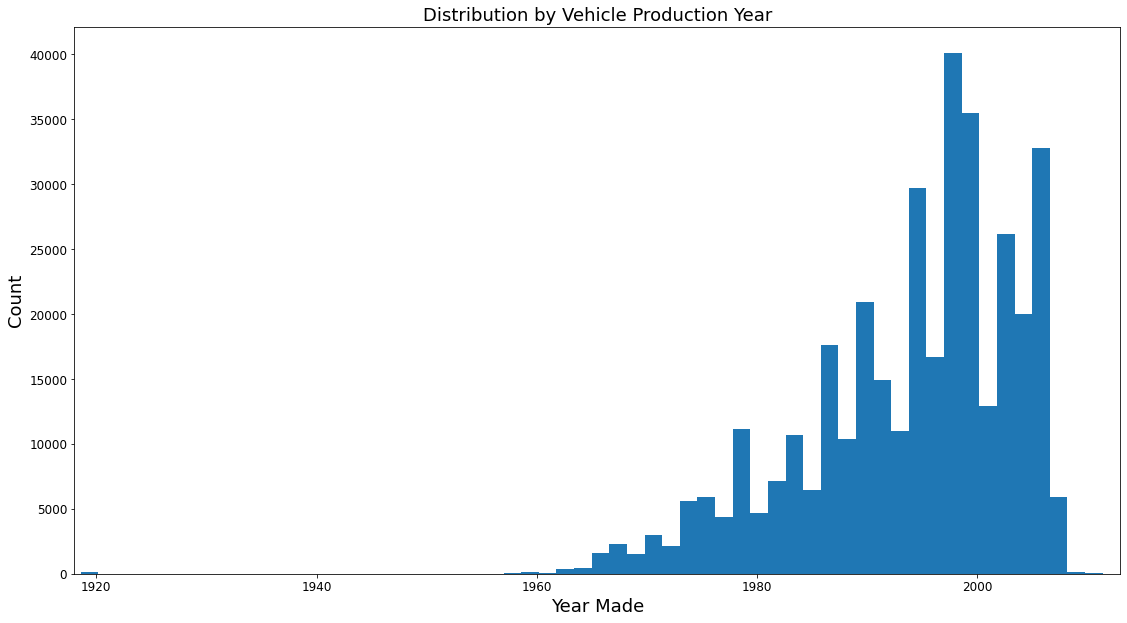

In [8]:
# plot YearMade frequency histogram
fig, ax = plt.subplots(figsize=(16, 9))

ax.hist(df['YearMade'], bins=int(len(df['YearMade'])**0.5));
ax.set_xlim(1918, 2013)

ax.set_title('Distribution by Vehicle Production Year')
ax.set_xlabel('Year Made')
ax.set_ylabel('Count')


fig.tight_layout()

fig.savefig('../img/distribution_year.jpg')

In [9]:
# create ProductSize dataframe
product_size = df.groupby('ProductSize').size().sort_values(ascending=False)

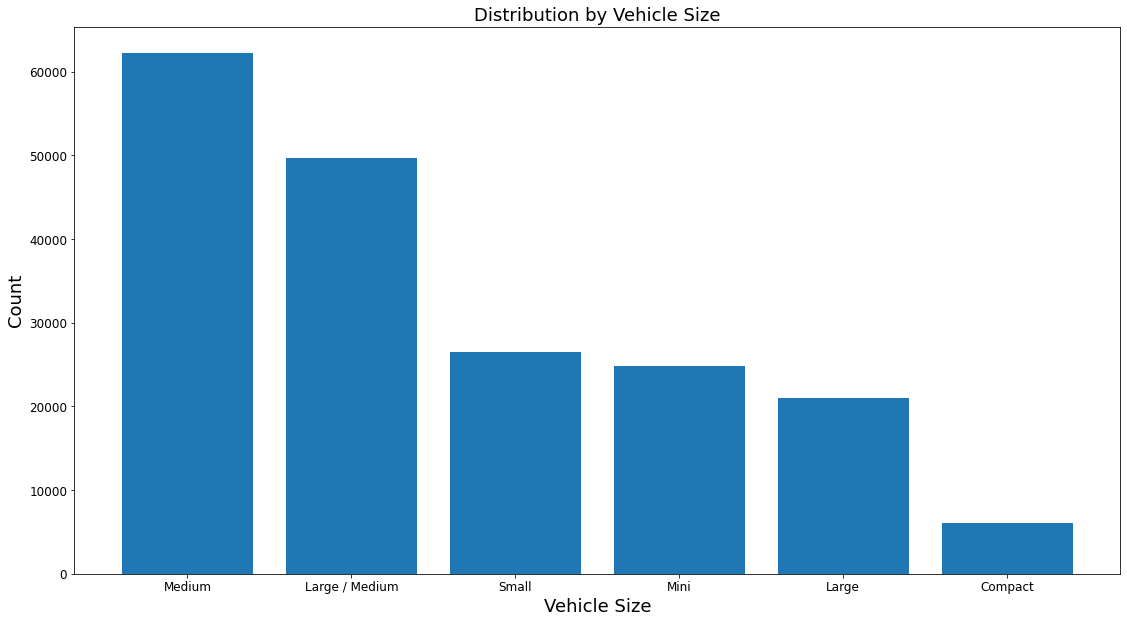

In [10]:
# plot ProductSize frequency histogram
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(product_size.index, product_size)

ax.set_title('Distribution by Vehicle Size')
ax.set_xlabel('Vehicle Size')
ax.set_ylabel('Count')

fig.tight_layout()

fig.savefig('../img/distribution_size.jpg')

In [11]:
# create ProductGroup dataframe
product_group = df.groupby('ProductGroup').size().sort_values(ascending=False)

<ipython-input-12-dd8ed211ad5b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels)


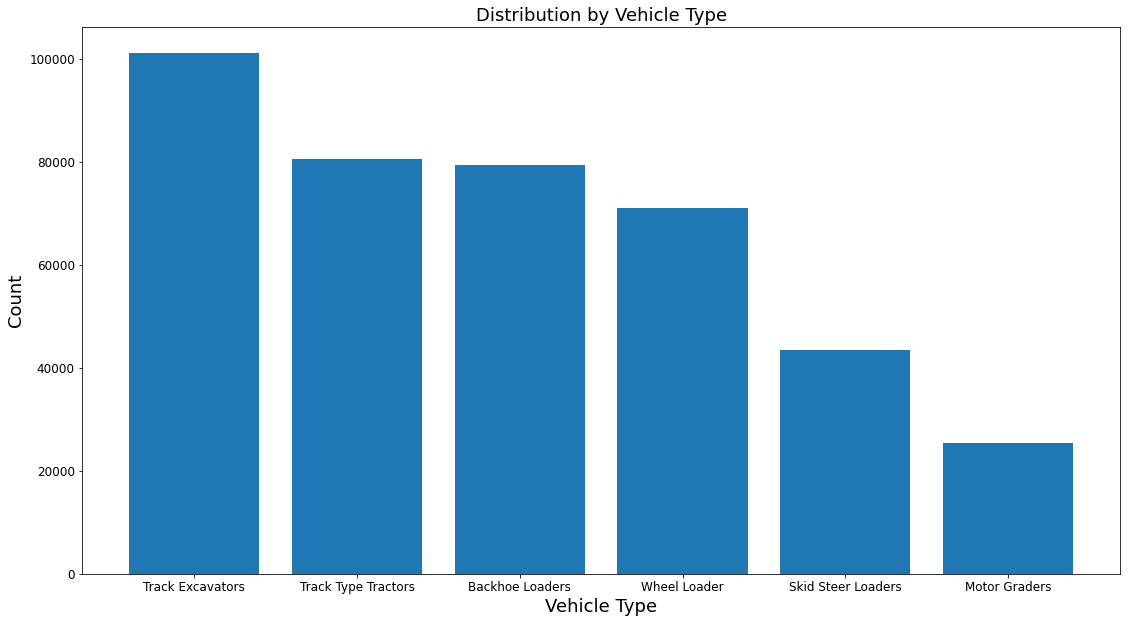

In [12]:
# plot ProductGroup frequency histogram
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(product_group.index, product_group)

labels = ['Track Excavators', 'Track Type Tractors', 'Backhoe Loaders', 'Wheel Loader', 'Skid Steer Loaders', 'Motor Graders']

ax.set_title('Distribution by Vehicle Type')
ax.set_xlabel('Vehicle Type')
ax.set_xticklabels(labels=labels)
ax.set_ylabel('Count')

fig.tight_layout()

fig.savefig('../img/distribution_type.jpg')

In [13]:
# create YearMade dataframe
year_price = df.iloc[:, [1, 2]].groupby('YearMade').mean()

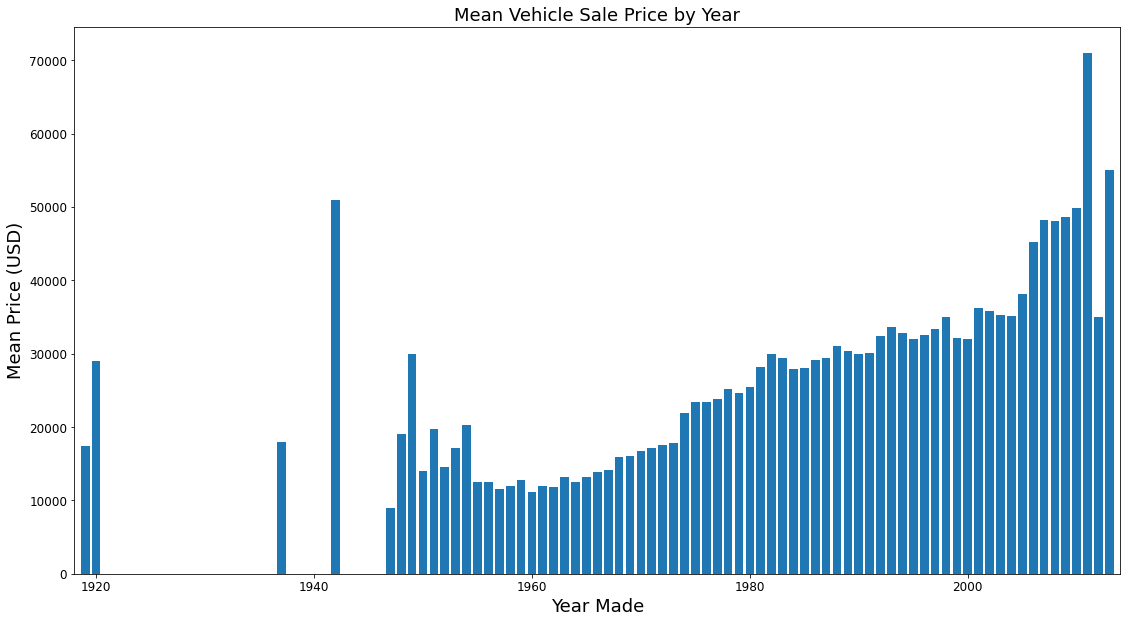

In [14]:
# plot YearMade mean price bar plot
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(year_price.index, year_price['SalePrice'])
ax.set_xlim(1918, 2014)
ax.set_title('Mean Vehicle Sale Price by Year')
ax.set_xlabel('Year Made')
ax.set_ylabel('Mean Price (USD)')

fig.tight_layout()

fig.savefig('../img/mean_price_year.jpg')

In [15]:
# create hours dataframe
hours_price = df.iloc[:, [1, 3]]

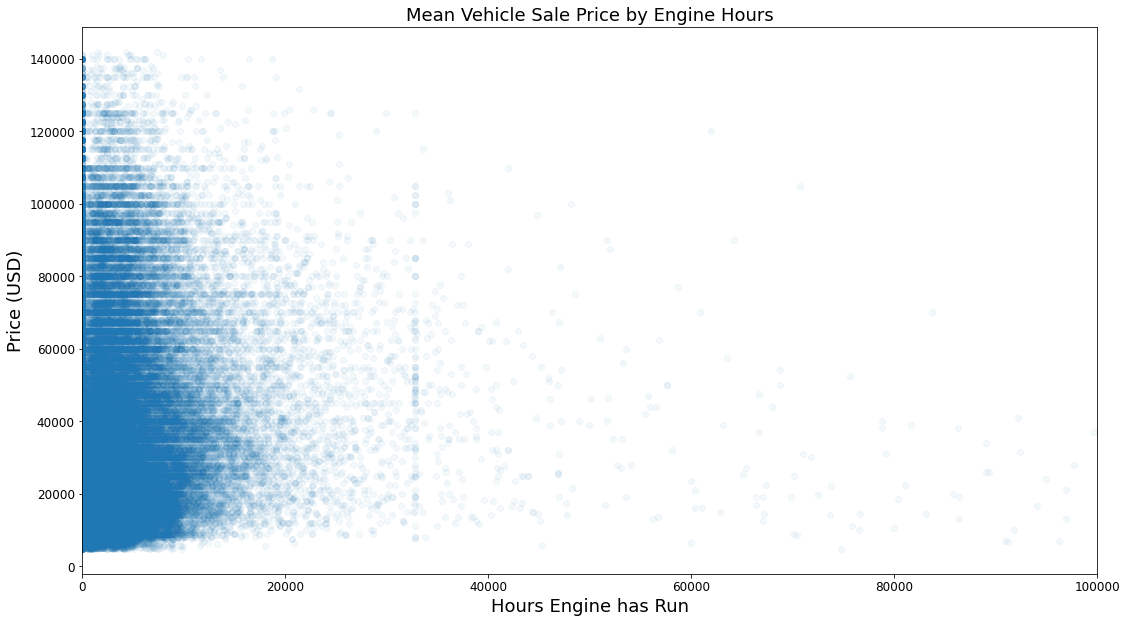

In [16]:
# plot hours run mean price bar plot
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(hours_price['MachineHoursCurrentMeter'], hours_price['SalePrice'], alpha=0.05)
ax.set_xlim(0, 100000)
ax.set_title('Mean Vehicle Sale Price by Engine Hours')
ax.set_xlabel('Hours Engine has Run')
ax.set_ylabel('Price (USD)')

fig.tight_layout()

fig.savefig('../img/mean_price_hours.jpg')

In [17]:
# create size dataframe
size_price = df.iloc[:, [1, 4]].groupby('ProductSize').mean().sort_values(by='SalePrice', ascending=False)

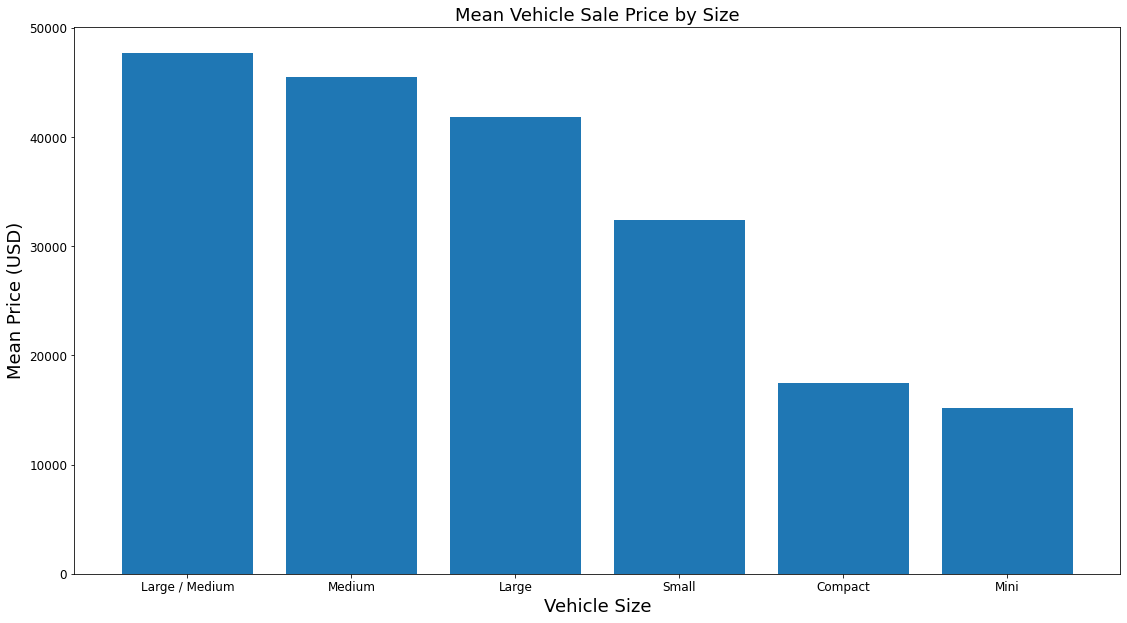

In [18]:
# plot vehicle size run mean price bar plot
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(size_price.index, size_price['SalePrice'])
ax.set_title('Mean Vehicle Sale Price by Size')
ax.set_xlabel('Vehicle Size')
ax.set_ylabel('Mean Price (USD)')

fig.tight_layout()

fig.savefig('../img/mean_price_size.jpg')

In [20]:
# create state dataframe
state_price = df.iloc[:, [1, 5]].groupby('state').mean().sort_values(by='SalePrice', ascending=False)

<ipython-input-22-9e3bf73bc623>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(states['state'], rotation=90)


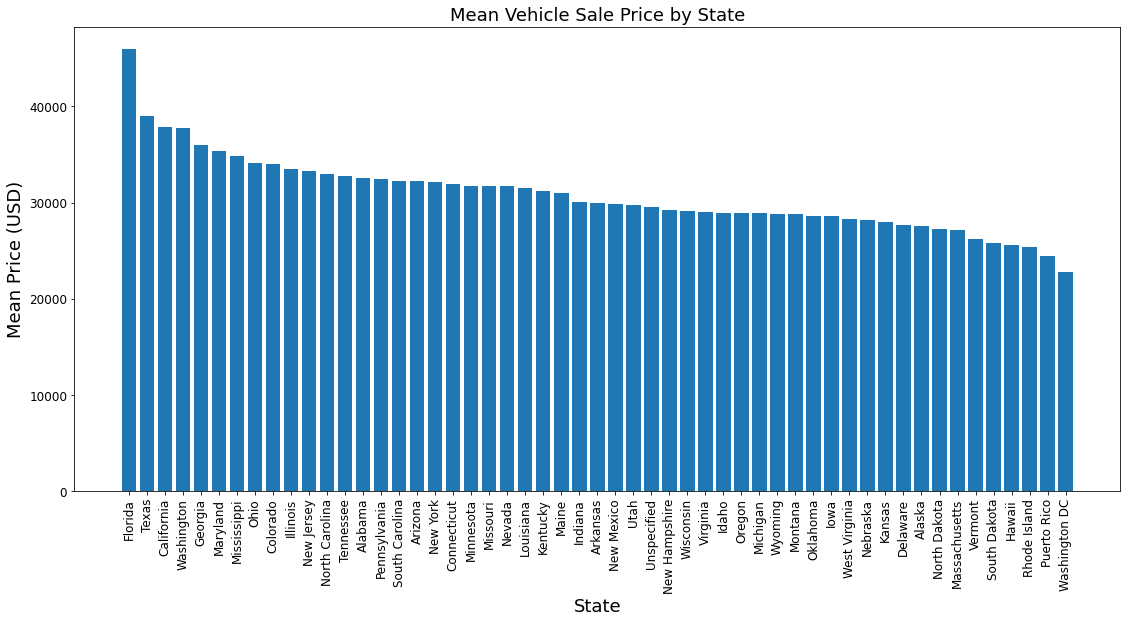

In [22]:
# plot state mean price bar plot
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(state_price.index, state_price['SalePrice'])
ax.set_title('Mean Vehicle Sale Price by State')
ax.set_xlabel('State')
ax.set_ylabel('Mean Price (USD)')
ax.set_xticklabels(states['state'], rotation=90)

fig.tight_layout()

fig.savefig('../img/mean_price_state.jpg')

In [23]:
# create group dataframe
group_price = df.iloc[:, [1, 6]].groupby('ProductGroup').mean().sort_values(by='SalePrice', ascending=False)

<ipython-input-24-aeb070862c64>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels)


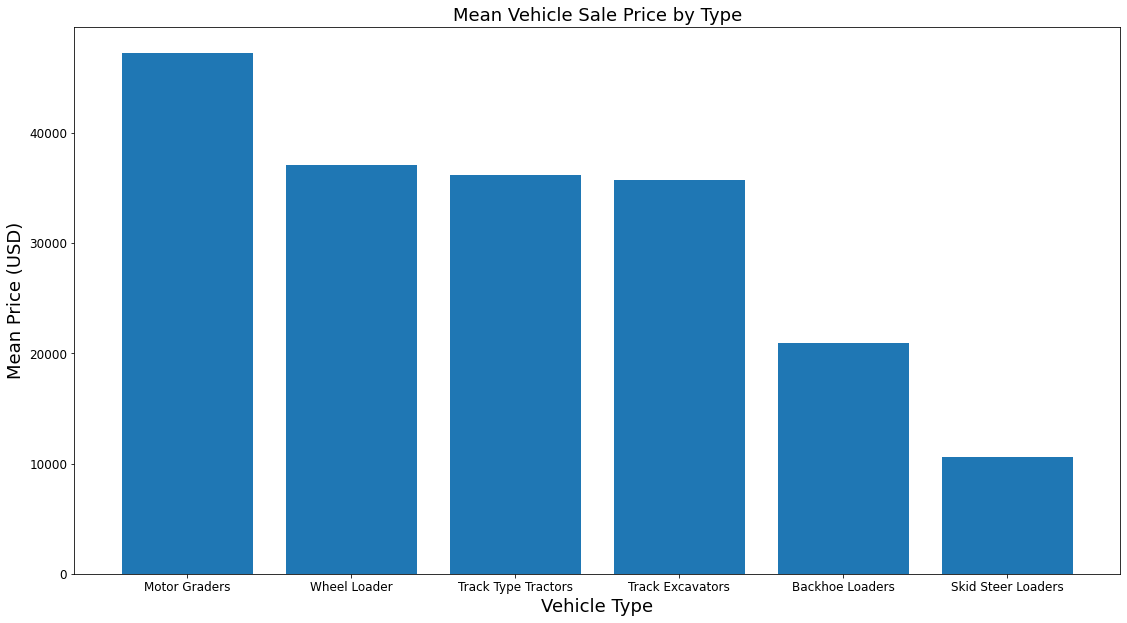

In [24]:
# plot vehicle group mean price bar plot
fig, ax = plt.subplots(figsize=(16, 9))

labels = ['Motor Graders', 'Wheel Loader', 'Track Type Tractors', 'Track Excavators', 'Backhoe Loaders', 'Skid Steer Loaders']

ax.bar(group_price.index, group_price['SalePrice'])
ax.set_title('Mean Vehicle Sale Price by Type')
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Mean Price (USD)')
ax.set_xticklabels(labels=labels)

fig.tight_layout()

fig.savefig('../img/mean_price_type.jpg')